# Project 1: Regression - Predicting Heart Disease from Personal Lifestyle Factors

<hr style="clear:both">

This notebook documents our journey to develop the best model for predicting heart disease in adults based on their personal lifestyle metrics and factors. We have employed three main machine learning algorithms to classify an individual's health status. These models include Ordinary Least Squares, Stochastic Gradient Descent, and Logistic Regression.

**Author(s):** [Luca Carroz](https://people.epfl.ch/emilie.carroz), [David Schroeter](https://people.epfl.ch/david.schroeter), [Paulo Ribeiro de Carvalho](https://people.epfl.ch/paulo.ribeirodecarvalho)

---

## Imports

Begin by importing well-known libraries to ensure the successful execution of this notebook. Additionally, we have created several custom libraries that need to be imported. Please note that we have included some non-allowed libraries, but only for visualization purposes. In this context, they are accepted as explained [here](https://edstem.org/eu/courses/797/discussion/57560).


In [1]:
# Import well known libraries
import numpy as np

# Our private libraries
from src.data_loading import *
from src.features_engineering import *
from src.hyperparameters_selection import *
from src.model_training import *

%load_ext autoreload
%autoreload 2

%load_ext autoreload
%autoreload 2## Load data

Once all the environment is established, we can now load the raw data.

In [2]:
# Fix the seed for reproducibility
SEED = 42

# Load data
x_train_raw, x_test_raw, y_train, _, x_test_indices = load_csv_data('dataset')

# Reformat y_train to have 0 instead of -1
y_train_base = y_train.copy()
y_train[y_train == -1] = 0

## Exploratory Data Analysis

We take a look at the data to find the features that looks categorical (a few discrete values) or descriptive (thousands of unique different discrete values). Then we proceed to a basic statistical analysis to catch potential correlation between data.

This way, we finish by proposing the list of attributes that could be possibly interesting and relevant to predict the disease.

### Features Insight
Gain insight about the raw data.

- How much unique different values are set to this attribute ?
- What are the linear correlation coefficient (Pearson) between the feature and its output ?

#### Raw Data
With a simple quick look at the data, we notice a considerable amount of "NaN" values. First, we keep them to make the simple analysis.

In [3]:
x_train_raw.shape

(328135, 321)

We replace the NaN values by a float that can't be confuse with a meaningful category. Since any negative float is used in the dataframe, we replace the NaN values by -1.0 to be able to threat NaN values as categories in each feature.

In [4]:
x_train_raw = np.nan_to_num(x_train_raw, nan=-1.0)

**Perform features analysis on raw data**

From the feature insight we are able to know metrics that seems categorical, meaning people are categorize in few sections represented by values. The goal here is to focus on few of them, e.g. the attributes with 5, 50 or 100 categories. Also, we display the features that looks the more linearly correlated with the output.

In [5]:
categorical_values_index_raw, correlated_values_index_raw, both_values_index_raw = features_analyze(x_train_raw,
                                                                                                    y_train, 1000, 0.2)

Features with less than 1000 unique values : 310
	[0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

#### Engineered Data (Feature Engineering Step)
Raw data tells us on each category (represented by a number) people has been associate for every feature. This information isn't that relevant since number associate to the different categories are not necessarily related with each other. Moreover, some big numbers are sometimes given to a specific category without any mathematical logic.

To make those categories more explicit to the model and to be more comparable for the model, we associate for each category, a risk score.

Risk scores are computed by looking at which percentage of people linked to a specific category are ill. We then compute this score for each category of each feature.

In [6]:
# Note : We already select the features with less than 100 distinct values (for computational and others reasons )
# Create the mapping between categories and their risk scores
risk_map = risk_mapping(x_train_raw[:, categorical_values_index_raw], y_train)

# Transform raw into risk data via the risk score mapping
x_train_risk = risk_transform(x_train_raw[:, categorical_values_index_raw], risk_map)
x_test_risk = risk_transform(x_test_raw[:, categorical_values_index_raw], risk_map)

Display the new transformed data.

In [7]:
x_train_risk.shape

(328135, 310)

**Perform features analysis on risk data**

From the feature insight we are able to know metrics that seems categorical, meaning people are categorize in few sections represented by values. The goal here is to focus on few of them, e.g. the attributes with 5, 50 or 100 categories. Also, we display the features that looks the more linearly correlated with the output.

In [8]:
categorical_values_index_risk, correlated_values_index_risk, both_values_index_risk = features_analyze(x_train_risk,
                                                                                                       y_train, 100,
                                                                                                       0.2)

Features with less than 100 unique values : 295
	[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

## Data set and features selection
We choose a data set and a list of feature from the gained insight of last sections. To recall, we have now :

-- Datasets :
1) Raw Data (x_train_raw, x_test_raw, y_train)
2) Risk Scored Data (x_train_risk, x_test_risk, y_train)

--List of features' index :
1) categorical_values_index_raw
2) correlated_values_index_raw
3) both_values_index_raw
3) categorical_values_index_risk
4) correlated_values_index_risk
5) both_values_index_risk

In [9]:
selected_training_data_set = x_train_risk  # Select the data set to work with
selected_testing_data_set = x_test_risk  # Select the data set to predict and submit in AI crowd.
attributes_ = correlated_values_index_risk  # Select the attributes used for the training and prediction

Perform the selection.

In [10]:
data_set_to_train = selected_training_data_set[:, attributes_]
data_set_to_test = selected_testing_data_set[:, attributes_]
data_set_to_train.shape

(328135, 16)

## Data Transformation
Apply some maybe useful transformation to increase performance of our model on the dataset selected to be trained.


### Balance data

Balance the data by oversampling and undersampling the training dataset. This way, all ouptut categories are represent similarly.

In [11]:
x_tr_oversampled, y_tr_oversampled = over_sample(data_set_to_train, y_train, SEED)
x_tr_undersampled, y_tr_undersampled = under_sample(data_set_to_train, y_train, SEED)

### Standardize data
Important step to standardize the data. Models convergence are improved this way.

In [12]:
# Only the standardization step
x_tr_standardize, x_te_standardize = standardize(data_set_to_train, data_set_to_test)

# Balance the data and standardize
x_tr_oversampled_standardize, x_te_standardize_over = standardize(x_tr_oversampled, data_set_to_test)
x_tr_undersampled_standardize, x_te_standardize_under = standardize(x_tr_undersampled, data_set_to_test)

## Model Best Parameters Selection
Find the best combination of few hyperparamters before starting the real training. To do so, please initialize the range of degrees and lambdas to explore. Also choose the number of fold wanted to find the best parameter using cross validation.

Data need also to be chosen now. To recall, we have now all this possible data sets from the selected set (raw or risk) :
1) data_set_to_train (full data)
2) x_tr_oversampled
3) x_tr_undersampled
4) x_tr_oversampled_standardize
5) x_tr_undersampled_standardize

In [13]:
x = x_tr_undersampled_standardize
y = y_tr_undersampled
k_fold = 2
degrees = np.arange(1, 7)
lambdas = np.logspace(-5, 2, 50)

### Baseline (Random guess)
What about a model that randomly guess the output. We choose this model as baseline and hope that our models will be a bit more performant. We observed that approximately $9\%$ of samples are ill. Then our random model will return randomly $9\%$ of ill people.

In [14]:
ratio_neg = np.sum(y_train == 0) / len(y_train)
ration_pos = 1 - ratio_neg


def random_model(x, seed):
    """
    Randomly predict the illness of a sample with 9% positives and other negatives.
    
    Args:
        x (np.ndarray): The dataset.

    Returns:
        np.ndarray: An array of random predictions with 1 or -1.

    """
    samples = x.shape[0]
    neg_ones = round(samples * ratio_neg)
    ones = round(samples * ration_pos)
    pred = np.hstack((-np.ones(neg_ones), np.ones(ones)))
    np.random.seed(seed)
    np.random.shuffle(pred)

    return pred

In [15]:
def testing_random_model(x, y, k_fold, seed):
    """
    Function to teset the random models
    
    Args:
        x (np.ndarray): The dataset
        y (np.ndarray): The expected predictions
        k_fold: 
        seed: 

    Returns:

    """
    k_indices = build_k_indices(y, k_fold, seed)

    accuracies = []
    f1_scores = []

    for k in k_indices:
        y_ = y[k]
        x_ = x[k]
        y_hat = random_model(x_, seed)
        accuracies.append(accuracy(y_hat, y_))
        f1_scores.append(f1_score(y_hat, y_))

    return accuracies, f1_scores

### Least Square

In [16]:
regression_func = "least_square"
gamma = None

best_degree_ols, best_lambda_ols, best_rmse_ols = best_degree_selection(x=x, y=y,
                                                                        degrees=degrees,
                                                                        k_fold=k_fold,
                                                                        gamma=gamma,
                                                                        regression_func=regression_func,
                                                                        seed=SEED,
                                                                        lambdas=None)
print(f"Cross validation method have found : \n"
      f"Best degree -> {best_degree_ols}\n"
      f"Best lamda -> {best_lambda_ols}\n"
      f"Loss -> {best_rmse_ols:.4f}")

Cross validation k-fold results:
	- Degree -> 1
	- Best lambda -> 0
	- Best rmse_te -> 0.08186492710809869
Cross validation k-fold results:
	- Degree -> 2
	- Best lambda -> 0
	- Best rmse_te -> 0.08099560113798056
Cross validation k-fold results:
	- Degree -> 3
	- Best lambda -> 0
	- Best rmse_te -> 0.08101505714591156
Cross validation k-fold results:
	- Degree -> 4
	- Best lambda -> 0
	- Best rmse_te -> 0.08099919941205799
Cross validation k-fold results:
	- Degree -> 5
	- Best lambda -> 0
	- Best rmse_te -> 0.0809954364786849
Cross validation k-fold results:
	- Degree -> 6
	- Best lambda -> 0
	- Best rmse_te -> 0.08100100336786581
Cross validation method have found : 
Best degree -> 5
Best lamda -> 0
Loss -> 0.0810


### Least Square (Ridge constraint)

Let's try how good would be a simple OLS model. First, let's find the best parameters.

Cross validation k-fold results:
	- Degree -> 1
	- Best lambda -> 0.00019306977288832496
	- Best rmse_te -> 0.08186451653781243
Cross validation k-fold results:
	- Degree -> 2
	- Best lambda -> 7.196856730011514e-05
	- Best rmse_te -> 0.08099560880065529
Cross validation k-fold results:
	- Degree -> 3
	- Best lambda -> 0.0005179474679231213
	- Best rmse_te -> 0.08100544096775172
Cross validation k-fold results:
	- Degree -> 4
	- Best lambda -> 0.0005179474679231213
	- Best rmse_te -> 0.08098357994030574
Cross validation k-fold results:
	- Degree -> 5
	- Best lambda -> 0.0005179474679231213
	- Best rmse_te -> 0.08098361535576006
Cross validation k-fold results:
	- Degree -> 6
	- Best lambda -> 0.0005179474679231213
	- Best rmse_te -> 0.08099192515830556


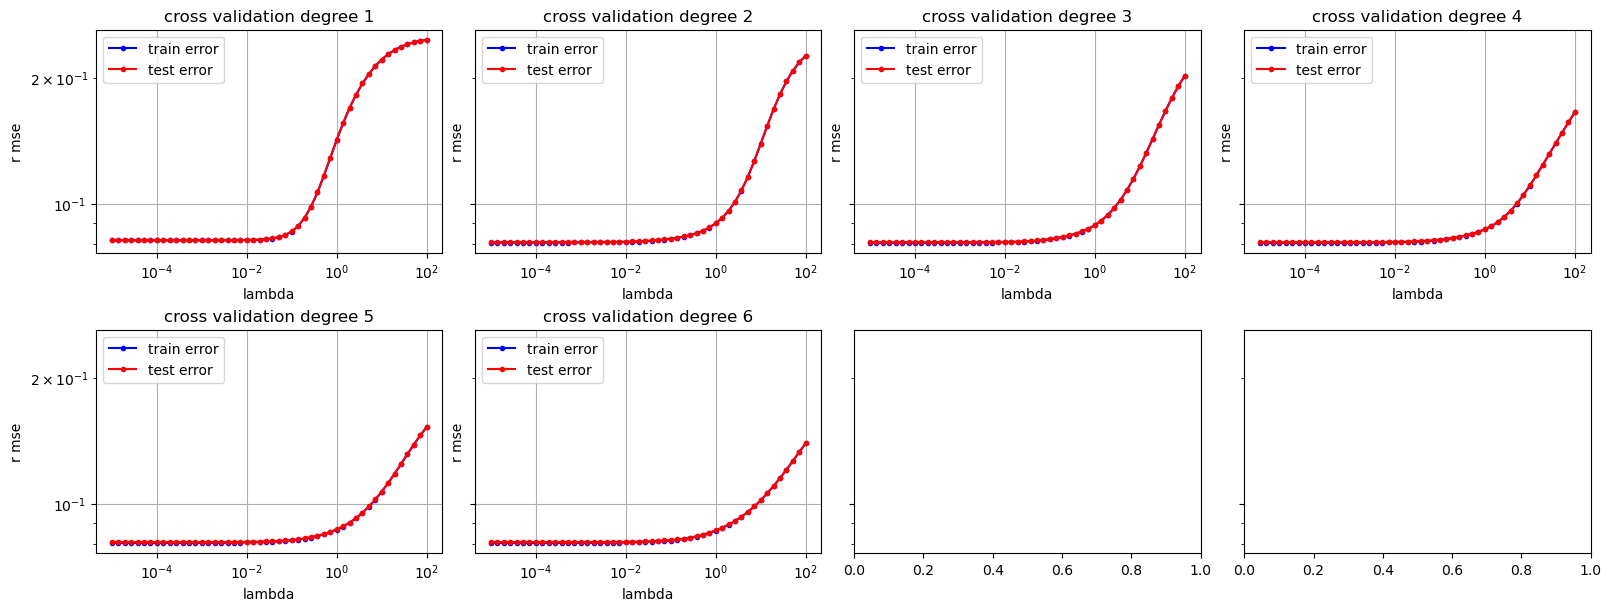

Cross validation method have found : 
Best degree -> 4
Best lamda -> 0.0005179474679231213
Loss -> 0.0810


In [17]:
regression_func = "ridge_regression"
gamma = None

best_degree_rols, best_lambda_rols, best_rmse_rols = best_degree_selection(x=x, y=y,
                                                                           degrees=degrees,
                                                                           k_fold=k_fold,
                                                                           gamma=gamma,
                                                                           regression_func=regression_func,
                                                                           seed=SEED,
                                                                           lambdas=lambdas)
print(f"Cross validation method have found : \n"
      f"Best degree -> {best_degree_rols}\n"
      f"Best lamda -> {best_lambda_rols}\n"
      f"Loss -> {best_rmse_rols:.4f}")

### Stochastic Gradient Descent

How about with Mean Square Stochastic Gradient Descent. First, let's find the best parameters.

In [18]:
regression_func = "mean_squared_error_sgd"
gamma = 0.0001
max_iters = 5000
degrees = np.arange(1, 5)
best_degree_sgd, _, best_rmse_sgd = best_degree_selection(x=x, y=y,
                                                          degrees=degrees,
                                                          k_fold=k_fold,
                                                          gamma=gamma,
                                                          regression_func=regression_func,
                                                          seed=SEED,
                                                          max_iters=max_iters)
print(f"Cross validation method have found : \n"
      f"Best degree -> {best_degree_sgd}\n"
      f"Loss -> {best_rmse_sgd:.4f}")

Cross validation k-fold results:
	- Degree -> 1
	- Best lambda -> 0
	- Best rmse_te -> 0.12941967438861335
Cross validation k-fold results:
	- Degree -> 2
	- Best lambda -> 0
	- Best rmse_te -> 0.08669208828594713
Cross validation k-fold results:
	- Degree -> 3
	- Best lambda -> 0
	- Best rmse_te -> 0.0876485865554624
Cross validation k-fold results:
	- Degree -> 4
	- Best lambda -> 0
	- Best rmse_te -> 0.08955404002375585
Cross validation method have found : 
Best degree -> 2
Loss -> 0.0867


Then we can train the model over all the train data set with best parameters.

### Logistic Regression

And finally, how about with Logistic Regression. First, let's find the best parameters.


In [19]:
regression_func = "logistic_regression"
gamma = 0.05
max_iters = 500
best_degree_lr, best_lambda_lr, best_rmse_lr = best_degree_selection(x=x, y=y,
                                                                     degrees=degrees,
                                                                     k_fold=k_fold,
                                                                     gamma=gamma,
                                                                     regression_func=regression_func,
                                                                     seed=SEED,
                                                                     lambdas=None,
                                                                     max_iters=max_iters)
print(f"Cross validation method have found : \n"
      f"Best degree -> {best_degree_lr}\n"
      f"Best lamda -> {best_lambda_lr}\n"
      f"Loss -> {best_rmse_lr:.4f}")

Cross validation k-fold results:
	- Degree -> 1
	- Best lambda -> 0
	- Best rmse_te -> 0.4944813923334008
Cross validation k-fold results:
	- Degree -> 2
	- Best lambda -> 0
	- Best rmse_te -> 0.49154981287884825
Cross validation k-fold results:
	- Degree -> 3
	- Best lambda -> 0
	- Best rmse_te -> 0.48969029421973176
Cross validation k-fold results:
	- Degree -> 4
	- Best lambda -> 0
	- Best rmse_te -> 0.5700619240655416
Cross validation method have found : 
Best degree -> 3
Best lamda -> 0
Loss -> 0.4897


## Model Training
Since we found the best hyperparameters for each model, we can now train them and compare their performances.


### Random model (Baseline)

In [20]:
k_fold = 20

y_ = y_train
y_neg = y_.copy()
y_neg[y_neg == 0] = -1

accuracies_random, f1_scores_random = testing_random_model(x_tr_standardize, y_neg, k_fold, SEED)


### Least Square

Fold 0 finished !
Fold 1 finished !
Fold 2 finished !
Fold 3 finished !
Fold 4 finished !
Fold 5 finished !
Fold 6 finished !
Fold 7 finished !
Fold 8 finished !
Fold 9 finished !
Fold 10 finished !
Fold 11 finished !
Fold 12 finished !
Fold 13 finished !
Fold 14 finished !
Fold 15 finished !
Fold 16 finished !
Fold 17 finished !
Fold 18 finished !
Fold 19 finished !


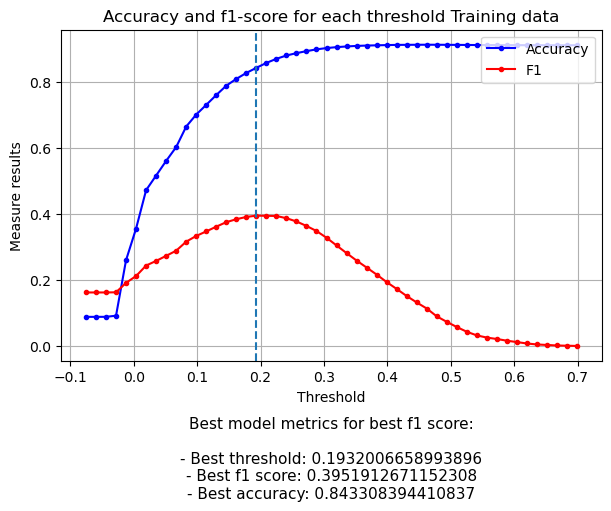

In [21]:
# Choose the last parameters of the regression
regression_func = "least_square"
x_ = build_poly(x_tr_standardize, degree=best_degree_ols)
x_test_ = build_poly(x_te_standardize, degree=best_degree_ols)

y_ = y_train
k_fold = 20

# Train the model
w_ols, accuracies_ols, f1_scores_ols = fit_model(x_, y_, regression_func, k_fold, SEED, plot_best_threshold=False)

# Find the best threshold for this average Least Square model
y_neg = y_.copy()
y_neg[y_neg == 0] = -1
threshold_ols = compute_best_threshold(x_, w_ols, y_neg, number=50, plot=True)


### Least Square (Ridge constraint)

Fold 0 finished !
Fold 1 finished !
Fold 2 finished !
Fold 3 finished !
Fold 4 finished !
Fold 5 finished !
Fold 6 finished !
Fold 7 finished !
Fold 8 finished !
Fold 9 finished !
Fold 10 finished !
Fold 11 finished !
Fold 12 finished !
Fold 13 finished !
Fold 14 finished !
Fold 15 finished !
Fold 16 finished !
Fold 17 finished !
Fold 18 finished !
Fold 19 finished !


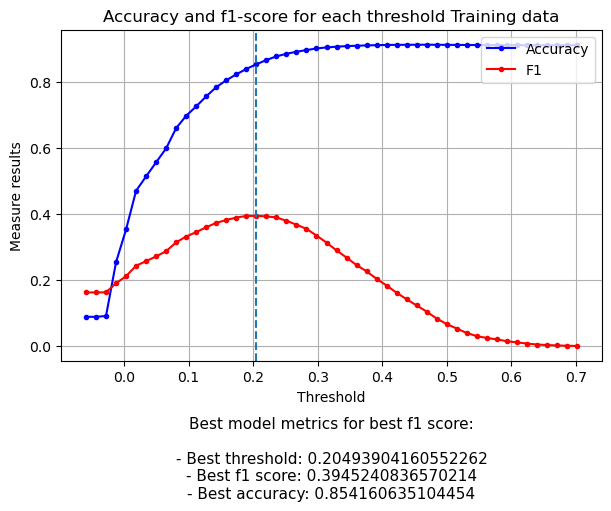

In [22]:
# Choose the last parameters of the regression
regression_func = "ridge_regression"
x_ = build_poly(x_tr_standardize, degree=best_degree_rols)
x_test_ = build_poly(x_te_standardize, degree=best_degree_rols)

y_ = y_train
k_fold = 20

# Train the model
w_rols, accuracies_rols, f1_scores_rols = fit_model(x_, y_, regression_func, k_fold, SEED,
                                                    lambda_=best_lambda_rols,
                                                    plot_best_threshold=False)

# Find the best threshold for this average Least Square model
y_neg = y_.copy()
y_neg[y_neg == 0] = -1
threshold_rols = compute_best_threshold(x_, w_rols, y_neg, number=50, plot=True)

### Stochastic Gradient Descent

Fold 0 finished !
Fold 1 finished !
Fold 2 finished !
Fold 3 finished !
Fold 4 finished !
Fold 5 finished !
Fold 6 finished !
Fold 7 finished !
Fold 8 finished !
Fold 9 finished !
Fold 10 finished !
Fold 11 finished !
Fold 12 finished !
Fold 13 finished !
Fold 14 finished !
Fold 15 finished !
Fold 16 finished !
Fold 17 finished !
Fold 18 finished !
Fold 19 finished !


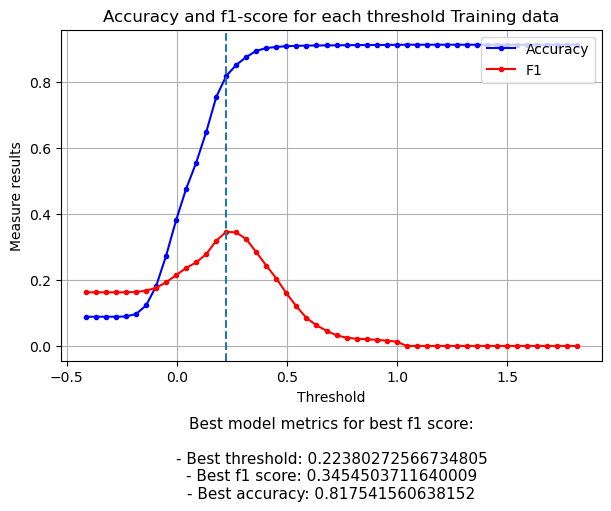

In [23]:
# Choose the last parameters of the regression
regression_func = "mean_squared_error_sgd"
x_ = build_poly(x_tr_standardize, degree=best_degree_sgd)
y_ = y_train
k_fold = 20
gamma = 0.001
max_iters = 5000

# Train the model
w_sgd, accuracies_sgd, f1_scores_sgd = fit_model(x_, y_, regression_func, k_fold, SEED,
                                                 gamma, max_iters=max_iters,
                                                 plot_best_threshold=False)

# Find the best threshold for this average Stochastic Gradient Descent model
y_neg = y_.copy()
y_neg[y_neg == 0] = -1
threshold_sgd = compute_best_threshold(x_, w_sgd, y_neg, number=50, plot=True)

### Logistic Regression

Fold 0 finished !
Fold 1 finished !
Fold 2 finished !
Fold 3 finished !
Fold 4 finished !
Fold 5 finished !
Fold 6 finished !
Fold 7 finished !
Fold 8 finished !
Fold 9 finished !
Fold 10 finished !
Fold 11 finished !
Fold 12 finished !
Fold 13 finished !
Fold 14 finished !
Fold 15 finished !
Fold 16 finished !
Fold 17 finished !
Fold 18 finished !
Fold 19 finished !


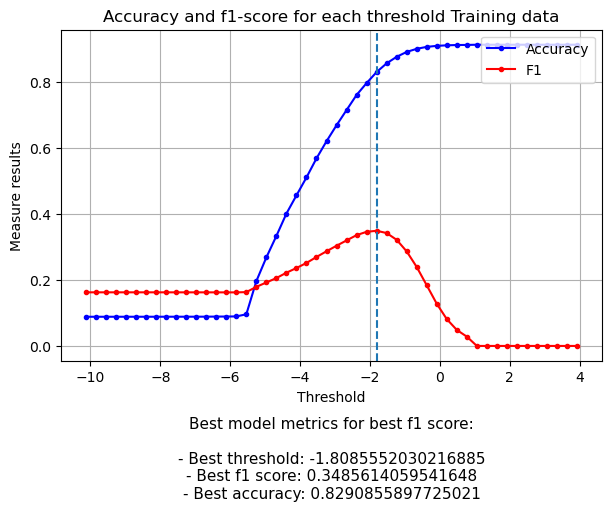

In [24]:
# Choose the last parameters of the regression
regression_func = "logistic_regression"
x_ = build_poly(x_tr_standardize, degree=best_degree_lr)
y_ = y_train
k_fold = 20
gamma = 0.05
max_iters = 500

# Train the model
w_lr, accuracies_lr, f1_scores_lr = fit_model(x_, y_, regression_func, k_fold, SEED,
                                              gamma, lambda_=None,
                                              max_iters=max_iters,
                                              plot_best_threshold=False)

# Find the best threshold for this average Stochastic Gradient Descent model
y_neg = y_.copy()
y_neg[y_neg == 0] = -1
threshold_lr = compute_best_threshold(x_, w_lr, y_neg, number=50, plot=True)

## Model Comparison

Let's see which model is more performant.

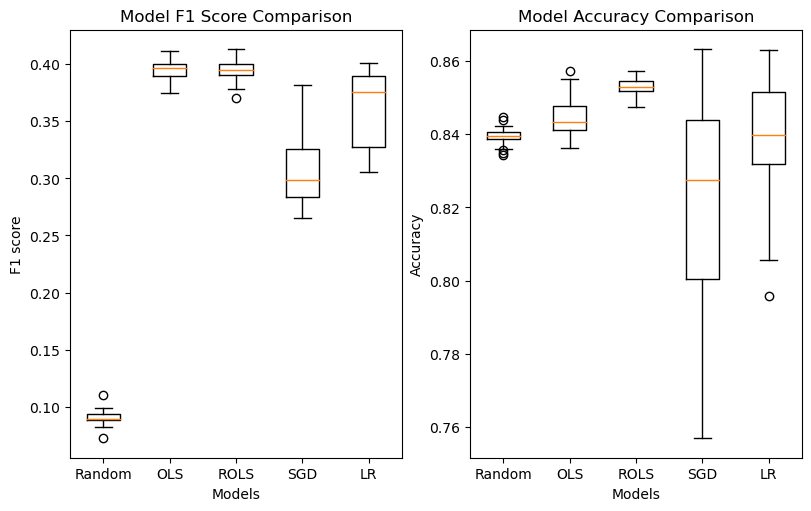

In [25]:
models = ["Random", "OLS", "ROLS", "SGD", "LR"]

fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(8, 5))

ax[0].boxplot([f1_scores_random, f1_scores_ols, f1_scores_rols, f1_scores_sgd, f1_scores_lr])

ax[0].set_title('Model F1 Score Comparison')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('F1 score')
ax[0].set_xticklabels(models)

ax[1].boxplot([accuracies_random, accuracies_ols, accuracies_rols, accuracies_sgd, accuracies_lr])

ax[1].set_title('Model Accuracy Comparison')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('Accuracy')
ax[1].set_xticklabels(models)

plt.show()

## Submission output

Depending on the training data set transformation that we performed before, please be consistent with the test data set.

1) data_set_to_test (no transformation)
2) x_te_standardize

**Only our best models will be output by default. (i.e. The ridge regression)**

In [26]:
# ROLS model prediction
x_te = build_poly(x_te_standardize, best_degree_rols)
y_hat_rols = predictions(x_te, w_rols, threshold_rols)
create_csv_submission(x_test_indices, y_hat_rols, 'output.csv')